In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score


from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("FData.csv")

In [3]:
data.head()

,Unnamed: 0,date,time,round,day,venue,result,gf,ga,opponent,...,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,0,2021-09-11,15:00,Matchweek 4,Sat,Home,W,1.0,0.0,Norwich City,...,15,5,0.000000,3.000000,9.666667,2.333333,14.833333,0.333333,0.0,0.0
1,1,2021-09-18,15:00,Matchweek 5,Sat,Away,W,1.0,0.0,Burnley,...,15,5,0.333333,2.333333,12.333333,3.000000,14.133333,0.333333,0.0,0.0
2,2,2021-09-26,16:30,Matchweek 6,Sun,Home,W,3.0,1.0,Tottenham,...,16,6,0.666667,1.666667,14.666667,3.000000,14.800000,0.666667,0.0,0.0
3,3,2021-10-02,17:30,Matchweek 7,Sat,Away,D,0.0,0.0,Brighton,...,17,5,1.666667,0.333333,18.333333,5.333333,18.433333,0.666667,0.0,0.0
4,4,2021-10-18,20:00,Matchweek 8,Mon,Home,D,2.0,2.0,Crystal Palace,...,20,0,1.333333,0.333333,11.000000,4.000000,19.833333,0.666667,0.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     979 non-null    int64  
 1   date           979 non-null    object 
 2   time           979 non-null    object 
 3   round          979 non-null    object 
 4   day            979 non-null    object 
 5   venue          979 non-null    object 
 6   result         979 non-null    object 
 7   gf             979 non-null    float64
 8   ga             979 non-null    float64
 9   opponent       979 non-null    object 
 10  xg             979 non-null    float64
 11  xga            979 non-null    float64
 12  poss           979 non-null    float64
 13  attendance     975 non-null    float64
 14  captain        979 non-null    object 
 15  formation      979 non-null    object 
 16  referee        979 non-null    object 
 17  match report   979 non-null    object 
 18  sh        

In [5]:
data = data[['venue_code','opp_code','hour','day_code','gf_rolling','ga_rolling','sh_rolling','sot_rolling','dist_rolling','pk_rolling','pkatt_rolling','target']]

In [6]:
data.rename({'target':'Win'},axis=1, inplace=True)

In [7]:
data.head()

,venue_code,opp_code,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,pk_rolling,pkatt_rolling,Win
0,1,16,15,5,0.000000,3.000000,9.666667,2.333333,14.833333,0.0,0.0,1
1,0,5,15,5,0.333333,2.333333,12.333333,3.000000,14.133333,0.0,0.0,1
2,1,19,16,6,0.666667,1.666667,14.666667,3.000000,14.800000,0.0,0.0,1
3,0,4,17,5,1.666667,0.333333,18.333333,5.333333,18.433333,0.0,0.0,0
4,1,7,20,0,1.333333,0.333333,11.000000,4.000000,19.833333,0.0,0.0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   venue_code     979 non-null    int64  
 1   opp_code       979 non-null    int64  
 2   hour           979 non-null    int64  
 3   day_code       979 non-null    int64  
 4   gf_rolling     979 non-null    float64
 5   ga_rolling     979 non-null    float64
 6   sh_rolling     979 non-null    float64
 7   sot_rolling    979 non-null    float64
 8   dist_rolling   979 non-null    float64
 9   pk_rolling     979 non-null    float64
 10  pkatt_rolling  979 non-null    float64
 11  Win            979 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 91.9 KB


In [9]:
X = data.drop('Win', axis =1)
y = data['Win']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
svm = SVC()

In [14]:
svm.fit(X_train, y_train)

SVC()

In [15]:
svm_prediction = svm.predict(X_test)

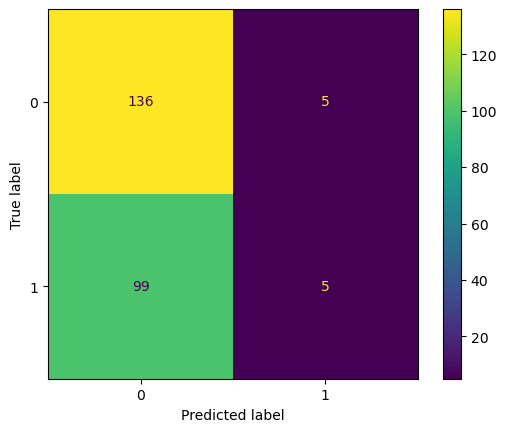

In [17]:
cm = confusion_matrix(y_test, svm_prediction)
cm_plot = ConfusionMatrixDisplay(cm, display_labels=svm.classes_).plot()

In [18]:
print(classification_report(y_test, svm_prediction))

              precision    recall  f1-score   support

           0       0.58      0.96      0.72       141
           1       0.50      0.05      0.09       104

    accuracy                           0.58       245
   macro avg       0.54      0.51      0.41       245
weighted avg       0.55      0.58      0.45       245



In [19]:
accuracy_score(y_test, svm_prediction)

0.5755102040816327

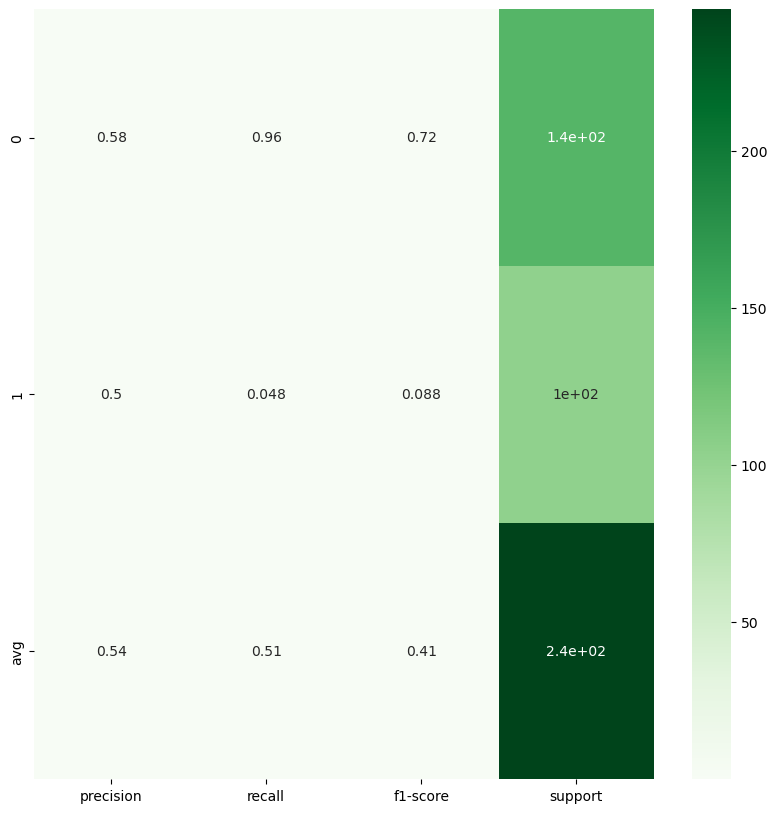

In [20]:
def plot_classification_report(y_tru, y_prd, figsize=(10, 10), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(y_tru))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep,
                annot=True, 
                cbar=True, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax,
                cmap="Greens")

plot_classification_report(y_test, svm_prediction)

# Grid Search

In [22]:
param_grid = { 
    'C':[0.1,1,100],
    'kernel':['rbf','poly','sigmoid','linear'],
    'degree':[1,2,3,4,5,6],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

In [23]:
# grid_svm = GridSearchCV(SVC(), param_grid=param_grid)
# grid_svm.fit(X_train, y_train)
# print(grid_svm.best_params_)
# print(grid_svm.best_estimator_)

# grid_predictions = grid_svm.predict(X_test)
  
# # print classification report
# print(classification_report(y_test, grid_predictions))

### Params Grid1:

In [24]:
param_grid1={
    'kernel':['poly'],
    'degree':[1,2,3,4],
}

In [25]:
grid_svm1 = GridSearchCV(SVC(), param_grid=param_grid1)
grid_svm1.fit(X_train, y_train)
print(grid_svm1.best_params_)
print(grid_svm1.best_estimator_)

{'degree': 4, 'kernel': 'poly'}
SVC(degree=4, kernel='poly')


In [26]:
grid_predictions1 = grid_svm1.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions1))

              precision    recall  f1-score   support

           0       0.58      0.92      0.71       141
           1       0.48      0.10      0.16       104

    accuracy                           0.57       245
   macro avg       0.53      0.51      0.44       245
weighted avg       0.54      0.57      0.48       245



### Params Grid2:

In [27]:
param_grid2={
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['rbf']
}

In [28]:
grid_svm2 = GridSearchCV(SVC(), param_grid=param_grid2)
grid_svm2.fit(X_train, y_train)
print(grid_svm2.best_params_)
print(grid_svm2.best_estimator_)

{'gamma': 0.01, 'kernel': 'rbf'}
SVC(gamma=0.01)


In [29]:
grid_predictions2 = grid_svm2.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions2))

              precision    recall  f1-score   support

           0       0.58      0.87      0.70       141
           1       0.46      0.15      0.23       104

    accuracy                           0.56       245
   macro avg       0.52      0.51      0.46       245
weighted avg       0.53      0.56      0.50       245



### Params Grid3:

In [30]:
param_grid3={
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['sigmoid']
}

In [31]:
grid_svm3 = GridSearchCV(SVC(), param_grid=param_grid3)
grid_svm3.fit(X_train, y_train)
print(grid_svm3.best_params_)
print(grid_svm3.best_estimator_)

{'gamma': 1, 'kernel': 'sigmoid'}
SVC(gamma=1, kernel='sigmoid')


In [32]:
grid_predictions3 = grid_svm3.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions3))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73       141
           1       0.00      0.00      0.00       104

    accuracy                           0.58       245
   macro avg       0.29      0.50      0.37       245
weighted avg       0.33      0.58      0.42       245



### RandomizedSearchCV :

In [33]:
# RANDOM SEARCH FOR 20 COMBINATIONS OF PARAMETERS
rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1)}

In [34]:
rand_search = RandomizedSearchCV(SVC(), param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 1) 
rand_search.fit(X_train, y_train) 
rand_search.cv_results_

{'mean_fit_time': array([0.02566592, 0.02166708, 0.01999871, 0.02366646, 0.02500041,
        0.02566449, 0.02466671, 0.02433419, 0.01933185, 0.02400017,
        0.02466464, 0.02733429, 0.02666593, 0.01966683, 0.02099888,
        0.0196681 , 0.02066573, 0.02466591, 0.01733208, 0.023     ]),
 'std_fit_time': array([0.00205445, 0.00524728, 0.00216053, 0.00094285, 0.00245068,
        0.00471449, 0.00385855, 0.0009419 , 0.0004721 , 0.00432128,
        0.00418986, 0.00449916, 0.00612781, 0.00046997, 0.00355919,
        0.00249521, 0.00286819, 0.00471275, 0.00047019, 0.00355924]),
 'mean_score_time': array([0.0203321 , 0.01833471, 0.01933018, 0.0240008 , 0.02166772,
        0.02266598, 0.02900092, 0.02066684, 0.01833375, 0.01833336,
        0.0273327 , 0.02366432, 0.01800052, 0.0166657 , 0.01700012,
        0.0189987 , 0.01933352, 0.01999935, 0.01700036, 0.01667102]),
 'std_score_time': array([3.39863259e-03, 4.78371568e-03, 1.69970656e-03, 4.90057112e-03,
        1.88733644e-03, 3.68175769e-

In [35]:
# summarize result
print('Best Score: %s' % rand_search.best_score_)
print('Best Hyperparameters: %s' % rand_search.best_params_)

Best Score: 0.6253429240548678
Best Hyperparameters: {'C': 2.8504421136977793, 'gamma': 0.13905478323288237}


In [36]:
y_pred_rand = rand_search.predict(X_test)

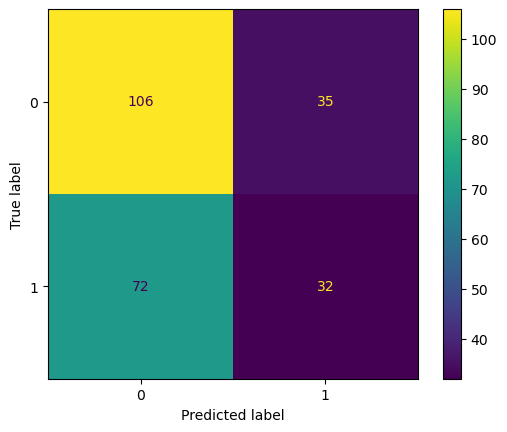

In [37]:
cm = confusion_matrix(y_test, y_pred_rand)
cm_plot = ConfusionMatrixDisplay(cm, display_labels=svm.classes_).plot()

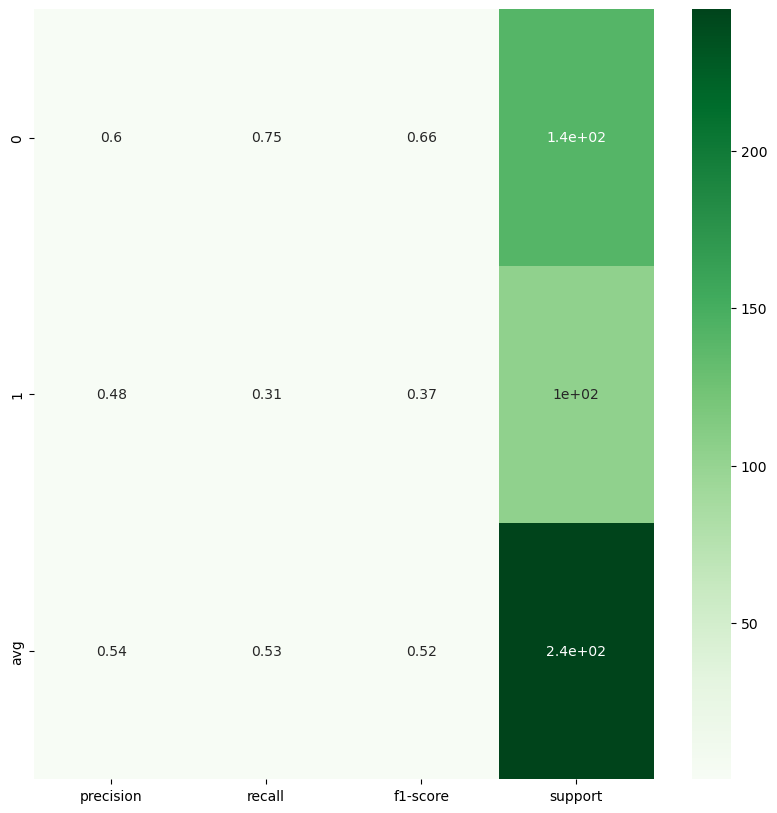

In [38]:
plot_classification_report(y_test, y_pred_rand)

## Naive Bayes Classifiers

In [39]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [40]:
y_pred_nb = nb.predict(X_test)

In [41]:
accuracy_score(y_test, y_pred_nb)

0.5265306122448979

In [42]:
print("Naive Bayes score: ",nb.score(X_test, y_test))

Naive Bayes score:  0.5265306122448979


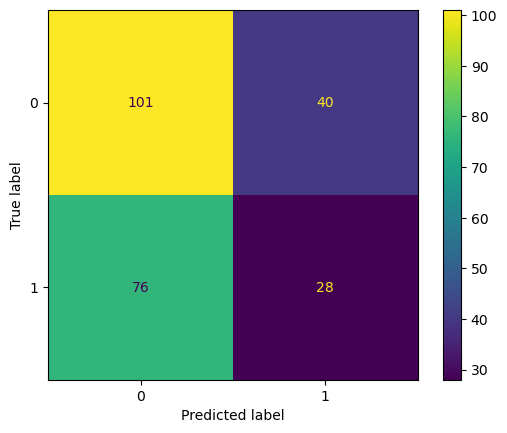

In [43]:
cm = confusion_matrix(y_test, y_pred_nb)
cm_plot = ConfusionMatrixDisplay(cm, display_labels=svm.classes_).plot()

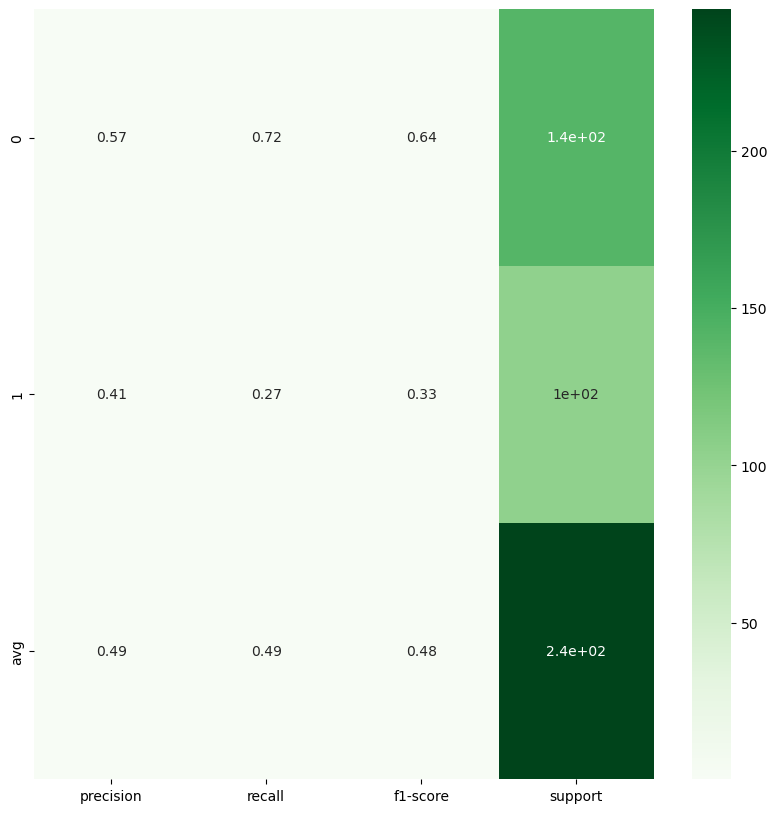

In [44]:
plot_classification_report(y_test, y_pred_nb)

## K-MEANS

In [46]:
data = pd.read_csv('matches.csv', index_col=0)

In [47]:
data.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,...,Match Report,NaN,10.0,2.0,14.6,1.0,0.0,0.0,2022,Arsenal
1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,...,Match Report,NaN,19.0,7.0,13.0,0.0,0.0,0.0,2022,Arsenal
2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,...,Match Report,NaN,14.0,6.0,14.8,0.0,0.0,0.0,2022,Arsenal
3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,...,Match Report,NaN,22.0,8.0,15.5,1.0,0.0,0.0,2022,Arsenal
4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,...,Match Report,NaN,22.0,8.0,16.3,1.0,0.0,0.0,2022,Arsenal


In [48]:
data.groupby('team').mean()

,gf,ga,xg,xga,poss,attendance,notes,sh,sot,dist,fk,pk,pkatt,season
team,,,,,,,,,,,,,,
Arsenal,1.807692,1.134615,1.798077,1.213462,54.115385,48106.211538,NaN,15.423077,5.057692,17.350000,0.557692,0.115385,0.173077,2021.269231
Aston Villa,1.269231,1.442308,1.226923,1.407692,47.000000,39840.288462,NaN,11.846154,4.115385,17.776923,0.500000,0.076923,0.076923,2021.269231
Bournemouth,1.200000,2.133333,0.766667,1.613333,38.466667,26146.333333,NaN,8.133333,3.200000,15.960000,0.266667,0.000000,0.000000,2022.000000
Brentford,1.339623,1.528302,1.354717,1.405660,44.735849,27609.867925,NaN,11.094340,3.754717,16.522642,0.301887,0.188679,0.188679,2021.283019
Brighton and Hove Albion,1.254902,1.196078,1.449020,1.256863,54.470588,36272.627451,NaN,13.078431,4.078431,17.415686,0.392157,0.137255,0.196078,2021.254902
Burnley,0.894737,1.394737,1.152632,1.681579,40.157895,29837.447368,NaN,10.657895,3.131579,17.452632,0.368421,0.026316,0.052632,2021.000000
Chelsea,1.788462,0.961538,1.657692,1.105769,60.769231,37952.576923,NaN,14.173077,4.846154,17.450000,0.538462,0.192308,0.211538,2021.269231
Crystal Palace,1.250000,1.230769,1.305769,1.242308,50.192308,32897.096154,NaN,10.692308,3.692308,16.857692,0.423077,0.115385,0.192308,2021.269231
Everton,1.018868,1.566038,1.188679,1.628302,41.358491,38005.358491,NaN,11.075472,3.415094,17.328302,0.396226,0.113208,0.132075,2021.283019


In [49]:
data_un = data.groupby('team').mean()

In [50]:
data_un.drop(['notes','season'], axis=1, inplace=True)

In [51]:
labels=data.team.unique()
labels

array(['Arsenal', 'Manchester City', 'Newcastle United',
       'Tottenham Hotspur', 'Manchester United', 'Liverpool',
       'Brighton and Hove Albion', 'Chelsea', 'Fulham', 'Brentford',
       'Crystal Palace', 'Leicester City', 'Bournemouth', 'Leeds United',
       'Aston Villa', 'West Ham United', 'Everton', 'Nottingham Forest',
       'Southampton', 'Wolverhampton Wanderers', 'Burnley', 'Watford',
       'Norwich City'], dtype=object)

In [52]:
teams = np.sort(labels)

In [53]:
pca = PCA(n_components=2)

data_pc = pd.DataFrame(pca.fit_transform(data_un), columns=['PC1', 'PC2'], index= teams)



In [54]:
data_pc

,PC1,PC2
Arsenal,9458.678475,0.528535
Aston Villa,1192.752137,-2.636146
Bournemouth,-12501.206110,-4.046732
Brentford,-11037.667743,1.962519
Brighton and Hove Albion,-2374.904080,6.913891
Burnley,-8810.091241,-3.931136
Chelsea,-694.951247,12.403767
Crystal Palace,-5750.437612,4.113708
Everton,-642.180730,-7.289803
Fulham,-3532.465121,-1.729753


<Figure size 1600x1400 with 0 Axes>

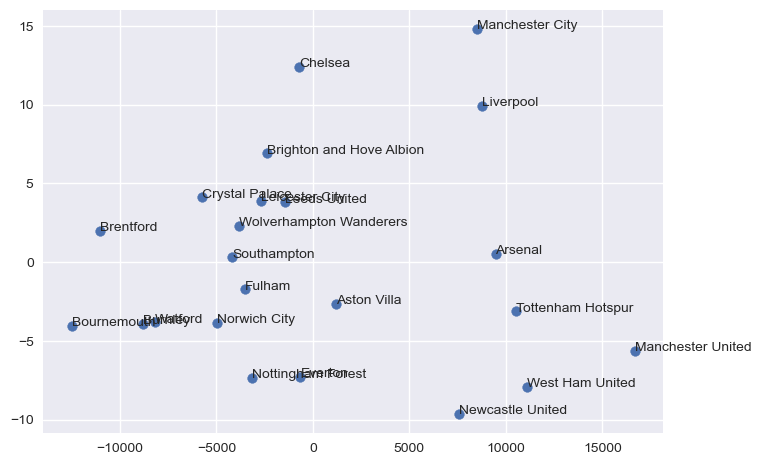

In [55]:
plt.figure(figsize=(16,14))
plt.style.use('seaborn')


x = data_pc['PC1']
y = data_pc['PC2']

teams = data_pc.index

fig, ax = plt.subplots()
ax.scatter(x, y);

for i, txt in enumerate(teams):
    ax.annotate(txt, (x[i], y[i]));

Text(0.5, 1.0, 'Elbow Curve to find optimum K')

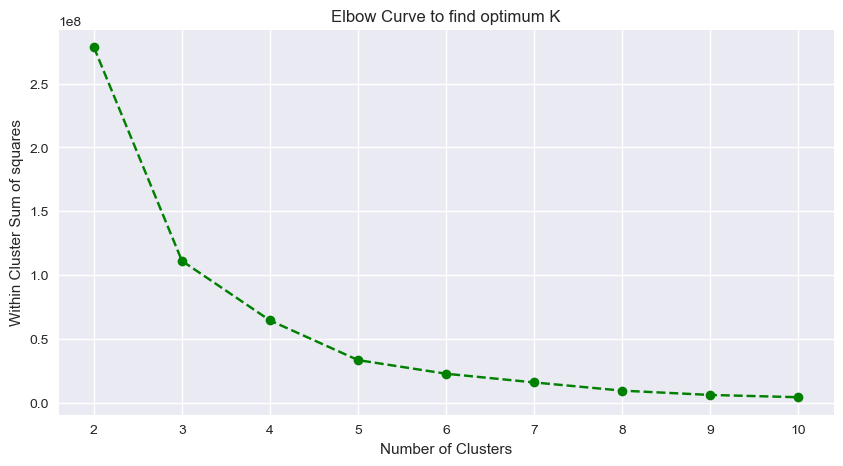

In [56]:
k = list(range(2,11))
sum_of_squared_distances = []
for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_pc)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k, sum_of_squared_distances, 'go--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of squares')
plt.title('Elbow Curve to find optimum K')

In [60]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(data_pc)

KMeans(n_clusters=5)

In [61]:
labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_

<Figure size 1600x1400 with 0 Axes>

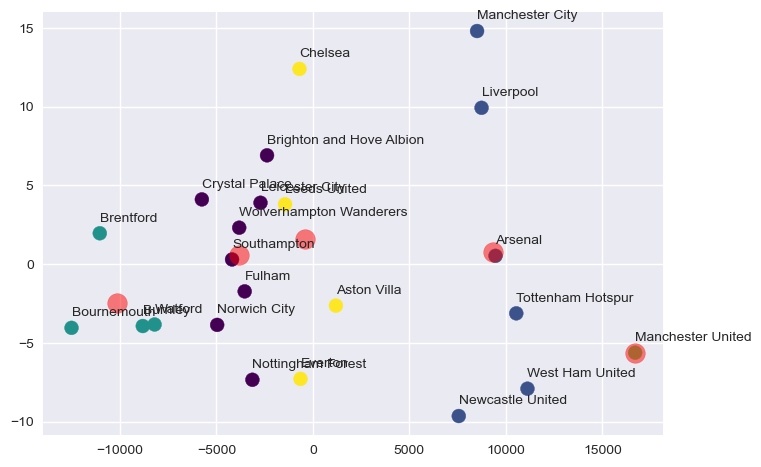

In [62]:
plt.figure(figsize=(16,14))
plt.style.use('seaborn')

teams = data_pc.index

fig, ax = plt.subplots()
plt.scatter( x = 'PC1' ,y = 'PC2' , data = data_pc, s = 100, c =labels1, cmap='viridis');
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 200 , c = 'red' , alpha = 0.5);

for i, txt in enumerate(teams):
    ax.annotate(txt, (x[i], y[i]), (x[i], y[i]+0.75));